In [1]:
from pyoxigraph import *
from RDF import RDF
from OWL import OWL
from RDFS import RDFS
from utils import *
from Ressources import *
from Ontology import *

/home/kipp_sa/github/EmbedAlign/embed/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.cuda.is_available()
print(device)

True


In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Example: embeddings tensor (N_samples x D)
# embeddings = torch.randn(50, 768, device='cuda')  # optionally on GPU



def plot_region(mu_2d, cov_2d, label=None, n_std=1.0, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,6))

    width, height, angle = covariance_to_ellipse_params(cov_2d, n_std)
    ellipse = Ellipse(
        xy=mu_2d.cpu().numpy(),
        width=width,
        height=height,
        angle=angle,
        edgecolor='blue',
        facecolor='lightblue',
        alpha=0.4
    )
    ax.add_patch(ellipse)
    ax.scatter(mu_2d[0].cpu().numpy(), mu_2d[1].cpu().numpy(), c='red', s=30)
    if label:
        ax.text(mu_2d[0].cpu().numpy(), mu_2d[1].cpu().numpy(), f" {label}", fontsize=12)
    ax.set_aspect('equal', 'box')
    ax.grid(True)
    return ax

In [4]:
file = "../test/bfo-core.ttl"
bfo = Ontology.load(file)

temporal instant has center tensor([-1.2703,  1.5853]) and covariance tensor([[ 1.1249e+02, -2.3127e-05],
        [-2.0666e-05, -1.0821e-08]])
temporal interval has center tensor([-1.1324, -0.0337]) and covariance tensor([[ 1.0363e+02, -8.7023e-06],
        [-6.2679e-06,  6.1284e-08]])
history has center tensor([0.2458, 1.9561]) and covariance tensor([[8.7307e+01, 6.1154e-05],
        [5.9870e-05, 1.6872e-08]])
zero-dimensional temporal region has center tensor([-1.3538,  0.0456]) and covariance tensor([[ 5.4074e+01, -7.1228e-06],
        [-6.8881e-06, -7.6488e-09]])
fiat point has center tensor([-2.3028,  0.3073]) and covariance tensor([[1.5507e+02, 4.6849e-05],
        [4.7383e-05, 9.4093e-09]])
fiat surface has center tensor([-2.2271, -0.3778]) and covariance tensor([[ 1.4787e+02,  1.0729e-05],
        [ 1.1817e-05, -8.7687e-08]])
relational quality has center tensor([-1.5883, -0.1861]) and covariance tensor([[ 1.2552e+02, -2.3603e-05],
        [-2.3483e-05,  1.3320e-07]])
fiat line

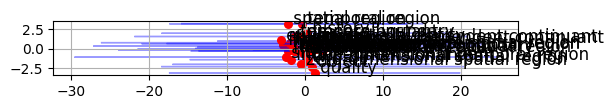

In [ ]:

figs, axs = plt.subplots()
for c in bfo.named_classes:
    center, cov = c.get_initial_region()
    print(f"{c} has center {center} and covariance {cov}")
    plot_region(center, cov, label=str(c), n_std=2.0, ax=axs)
    plt.plot()

In [8]:
word_1 = "bank"
sentences = ["I have 200 dollars in my bank account", 
            "My bank is on 35th street", 
            "I took out a lone at my bank",
            "my bank is closed on weekends"]
sentences_2 = ["the ship is at the river bank", 
            "the river bank is muddy", 
            "I like sitting at bank of the river",
            "the river bank can not close"]

tensor([-2.1181, -0.9043]) tensor([[ 9.2144e+01, -9.2983e-06],
        [-9.9540e-06,  5.8347e+01]])
tensor([1.3602, 1.4861]) tensor([[ 5.8221e+01, -3.8147e-06],
        [-3.6955e-06,  3.6039e+01]])


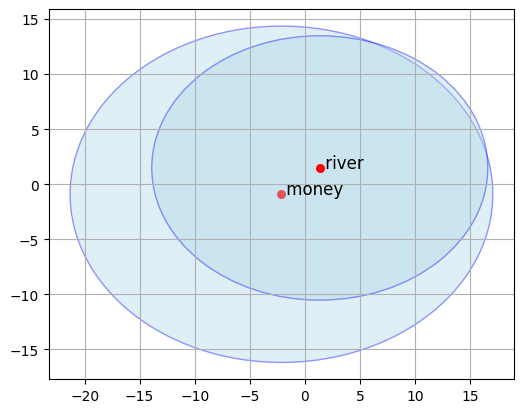

In [9]:
mu_2d, cov_2d = get_center_and_cov(word_1, sentences)
print(mu_2d, cov_2d)
mu_2d_2, cov_2d_2 = get_center_and_cov(word_1, sentences_2)
print(mu_2d_2, cov_2d_2)
# 4. Plot
fig, ax = plt.subplots(figsize=(6,6))
plot_region(mu_2d, cov_2d, label="money", n_std=2.0, ax=ax)
plot_region(mu_2d_2, cov_2d_2, label="river", n_std=2.0, ax=ax)

plt.show()
